# 4. MACHINE LEARNING MODEL
---

### 4.0. Import libraries and clean dataset

In [2]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

# DATASETS
early_train_data = pd.read_csv(r'..\data\interim\early_x_train.csv')
early_test_data = pd.read_csv(r'..\data\interim\early_x_test.csv')
sel_train_data = pd.read_csv(r'..\data\processed\x_train.csv')
sel_test_data = pd.read_csv(r'..\data\processed\x_test.csv')
target = 'ObesityCategory'

# Early Dataset
X_early_train = early_train_data.drop([target], axis=1)
y_early_train = early_train_data[target]
X_early_test = early_test_data.drop([target], axis=1)
y_early_test = early_test_data[target]

# Selected Dataset
X_sel_train = sel_train_data.drop([target], axis=1)
y_sel_train = sel_train_data[target]
X_sel_test = sel_test_data.drop([target], axis=1)
y_sel_test = sel_test_data[target]

### 1.1. Creating a model comparison for all datasets

In [3]:
# Dictionary to store datasets
datasets = {
    'early': {'X_train': X_early_train, 'y_train': y_early_train, 'X_test': X_early_test, 'y_test': y_early_test},
    'sel': {'X_train': X_sel_train, 'y_train': y_sel_train, 'X_test': X_sel_test, 'y_test': y_sel_test}
}

# Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Loop over datasets
for dataset_name, data in datasets.items():
    X_train, y_train, X_test, y_test = data['X_train'], data['y_train'], data['X_test'], data['y_test']  
    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Additional code for evaluation or other tasks
    # Print the dataset name
    print(f"Model fitted for {dataset_name} dataset has a total score of {round(accuracy_score(y_test, y_pred),3)}.")

Model fitted for early dataset has a total score of 1.0.
Model fitted for sel dataset has a total score of 1.0.


It is possible to see that the both datasets provides a perfect score (1.0). 

However, since the objective of this project is to develop a user-friendly machine learning model, I will delete the BMI variable.
I understand that this will affect the final score, but I prefer to have a better deployment.

In [4]:
# REPLACING THE VARIABLES
X_train = X_sel_train.drop(columns=['BMI'])
y_train = y_sel_train
X_test = X_sel_test.drop(columns=['BMI'])
y_test = y_sel_test

# model initialization and training 
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 1.2. model graph

In [5]:
X_train.columns

Index(['Height', 'Weight'], dtype='object')

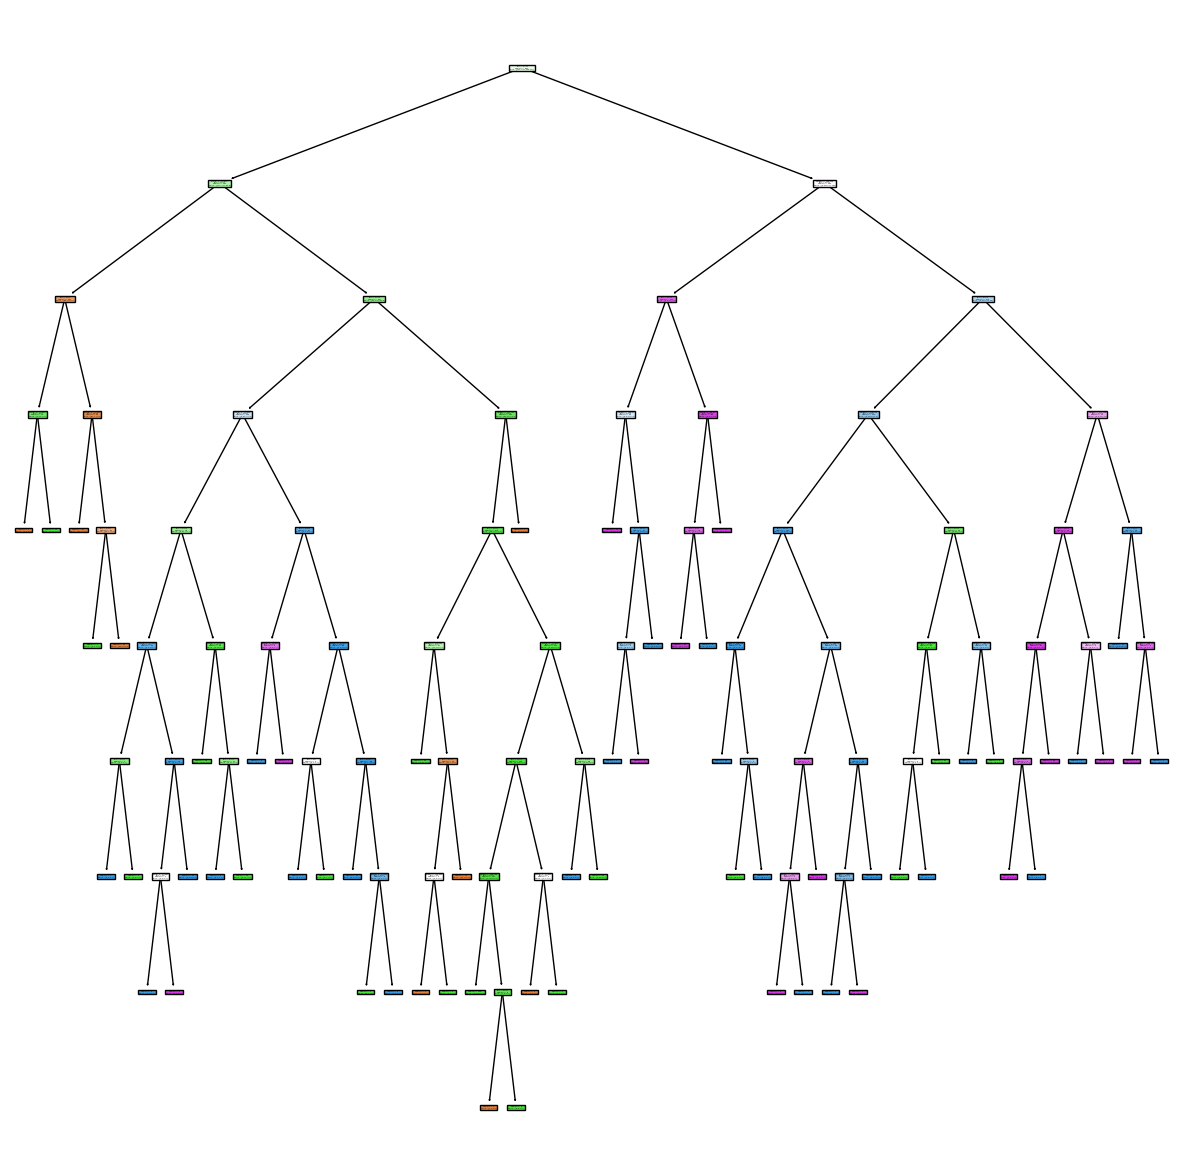

In [6]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train.columns), filled = True)
plt.show()

### 1.3. model prediction and score

In [7]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.895

### 1.4. model optimization

In [8]:
from sklearn.model_selection import GridSearchCV

# DEFINE HYPERPARAMETERS GRID
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# SEARCH FOR IMPROVEMENTS
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [9]:
from sklearn.metrics import accuracy_score

# DEFINE BEST HYPERPARAMETERS
optimized = {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state' : 42}

# CREATE NEW MODEL
opt_model = DecisionTreeClassifier(**optimized)
opt_model.fit(X_train, y_train)
y_pred = opt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the new model:", accuracy)

Accuracy of the new model: 0.94


After the improvement, the accuracy of the model is 0.94.

### 1.6. saving the model

In [10]:
from pickle import dump
dump(model, open("../models/tree_classifier_streamlit.sav", "wb"))


---
## CONCLUSIONS

- The model provided a score of 1.0 using both dataset (original and feature-selected)

- The model had the variable BMI deleted and its accuray decreased to 0.895

- The model had a grid search for optimization and its accuracy increased to 0.94
